**NOTE: This project was completed with the assistance of Gemini AI built into Google Colab.**

# Frequentist Inference Case Study - Part A

## 1. Learning objectives

Welcome to part A of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. Frequentist inference is the process of deriving conclusions about an underlying distribution via the observation of data. In particular, you'll practice writing Python code to apply the following statistical concepts:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

## Prerequisites

To be able to complete this notebook, you are expected to have a basic understanding of:
* what a random variable is (p.400 of Professor Spiegelhalter's *The Art of Statistics, hereinafter AoS*)
* what a population, and a population distribution, are (p. 397 of *AoS*)
* a high-level sense of what the normal distribution is (p. 394 of *AoS*)
* what the t-statistic is (p. 275 of *AoS*)

Happily, these should all be concepts with which you are reasonably familiar after having read ten chapters of Professor Spiegelhalter's book, *The Art of Statistics*.

We'll try to relate the concepts in this case study back to page numbers in *The Art of Statistics* so that you can focus on the Python aspects of this case study. The second part (part B) of this case study will involve another, more real-world application of these tools.

For this notebook, we will use data sampled from a known normal distribution. This allows us to compare our results with theoretical expectations.

## 2. An introduction to sampling from the normal distribution

First, let's explore the ways we can generate the normal distribution. While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community, you're likely to have heard of [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html) if you're coming from the sciences. For this assignment, you'll use [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) to complete your work.

This assignment will require some digging around and getting your hands dirty (your learning is maximized that way)! You should have the research skills and the tenacity to do these tasks independently, but if you struggle, reach out to your immediate community and your mentor for help.

In [ ]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

__Q1:__ Call up the documentation for the `norm` function imported above. (Hint: that documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)). What is the second listed method?

In [ ]:
help(norm)

Help on norm_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.norm_gen object>
    A normal continuous random variable.

    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.

    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.

    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometim

__A:__ pdf(x, loc=0, scale=1)
        Probability density function.

__Q2:__ Use the method that generates random variates to draw five samples from the standard normal distribution.

In [ ]:
samples = norm.rvs(size=5)
print(samples)

[ 0.71066198  0.15709292 -0.72932102 -0.41781711  0.30208708]


__A:__ samples = norm.rvs(size=5)
print(samples)

In [ ]:
seed(47)
# draw five samples here
samples = norm.rvs(size=5)
print(samples)

[-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


__Q3:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution. If you want a reminder of the properties of this distribution, check out p. 85 of *AoS*.

__A:__ 0.19355593334131074

The expected mean of a normal distribution should be zero as it is symmetrical along zero.


In [ ]:
# Calculate and print the mean here, hint: use np.mean()
mean = np.mean(samples)
print(mean)

0.19355593334131074


__Q4:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$ (This is just the definition of **standard deviation** given by Professor Spiegelhalter on p.403 of *AoS*). Hint: np.sqrt() and np.sum() will be useful here and remember that numPy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__ 0.9606195639478641

In [ ]:
std = np.sqrt(np.sum((samples - mean)**2)/len(samples))
print(std)

0.9606195639478641


Here we have calculated the actual standard deviation of a small data set (of size 5). But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die!

In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

You can see Bessel's correction reflected in Professor Spiegelhalter's definition of **variance** on p. 405 of *AoS*.

__Q5:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

__A:__ 1.0740053227518152

In [ ]:
pop_std = np.sqrt(np.sum((samples - mean)**2)/(len(samples)-1))
print(pop_std)

1.0740053227518152


__Q6:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

__A:__ It returned the standard deviation given by Professor Spiegelhalter.

In [ ]:
np_std = np.std(samples)
print(np_std)

0.9606195639478641


__Q7:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

__A:__


*   List item
*   List item



In [ ]:
help(np.std)


Help on _ArrayFunctionDispatcher in module numpy:

std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>, mean=<no value>, correction=<no value>)
    Compute the standard deviation along the specified axis.

    Returns the standard deviation, a measure of the spread of a distribution,
    of the array elements. The standard deviation is computed for the
    flattened array by default, otherwise over the specified axis.

    Parameters
    ----------
    a : array_like
        Calculate the standard deviation of these values.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the standard deviation is computed. The
        default is to compute the standard deviation of the flattened array.

        .. versionadded:: 1.7.0

        If this is a tuple of ints, a standard deviation is performed over
        multiple axes, instead of a single axis or all the axes as before.
    dtype : dtype, optional
        Type to use i

In [ ]:
print(np.std(samples, ddof = 1))

1.0740053227518152


### Summary of section

In this section, you've been introduced to the scipy.stats package and used it to draw a small sample from the standard normal distribution. You've calculated the average (the mean) of this sample and seen that this is not exactly equal to the expected population parameter (which we know because we're generating the random variates from a specific, known distribution). You've been introduced to two ways of calculating the standard deviation; one uses $n$ in the denominator and the other uses $n-1$ (Bessel's correction). You've also seen which of these calculations np.std() performs by default and how to get it to generate the other.

You use $n$ as the denominator if you want to calculate the standard deviation of a sequence of numbers. You use $n-1$ if you are using this sequence of numbers to estimate the population parameter. This brings us to some terminology that can be a little confusing.

The population parameter is traditionally written as $\sigma$ and the sample statistic as $s$. Rather unhelpfully, $s$ is also called the sample standard deviation (using $n-1$) whereas the standard deviation of the sample uses $n$. That's right, we have the sample standard deviation and the standard deviation of the sample and they're not the same thing!

The sample standard deviation
\begin{equation}
s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}} \approx \sigma,
\end{equation}
is our best (unbiased) estimate of the population parameter ($\sigma$).

If your dataset _is_ your entire population, you simply want to calculate the population parameter, $\sigma$, via
\begin{equation}
\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}
\end{equation}
as you have complete, full knowledge of your population. In other words, your sample _is_ your population. It's worth noting that we're dealing with what Professor Spiegehalter describes on p. 92 of *AoS* as a **metaphorical population**: we have all the data, and we act as if the data-point is taken from a population at random. We can think of this population as an imaginary space of possibilities.

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population. In this case, the standard deviation of your sample is not an unbiased estimate of the standard deviation of the population, in which case you seek to estimate that population parameter via the sample standard deviation, which uses the $n-1$ denominator.

Great work so far! Now let's dive deeper.

## 3. Sampling distributions

So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics. If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. **The Central Limit Theorem (CLT)** tells us that such a distribution will approach a normal distribution as $n$ increases (the intuitions behind the CLT are covered in full on p. 236 of *AoS*). For the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

This is important because typically we are dealing with samples from populations and all we know about the population is what we see in the sample. From this sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values and by calculating the mean and standard deviation (as estimates of the population parameters), and so we are intrinsically interested in how these quantities vary across samples.

In other words, now that we've taken one sample of size $n$ and made some claims about the general population, what if we were to take another sample of size $n$? Would we get the same result? Would we make the same claims about the general population? This brings us to a fundamental question: _when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?_

We need to think about **estimates and confidence intervals**: those concepts covered in Chapter 7, p. 189, of *AoS*.

Now, the standard normal distribution (with its variance equal to its standard deviation of one) would not be a great illustration of a key point. Instead, let's imagine we live in a town of 50,000 people and we know the height of everyone in this town. We will have 50,000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [ ]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

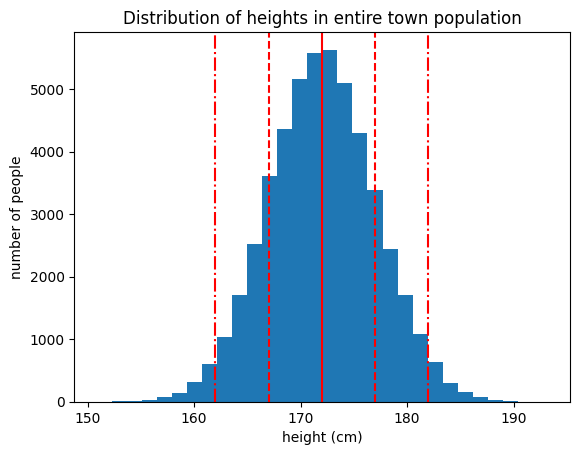

In [ ]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Now, 50,000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [ ]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [ ]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

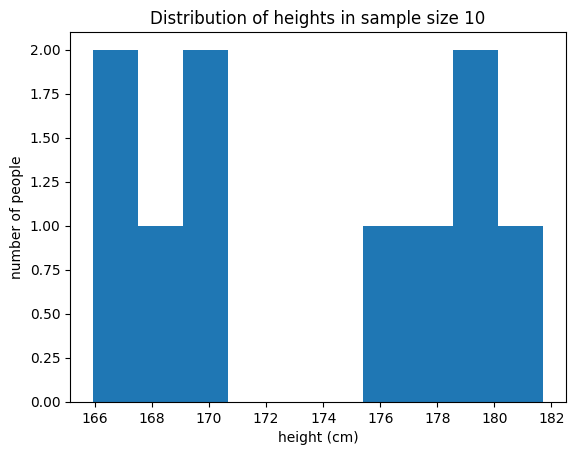

In [ ]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

The sample distribution doesn't resemble what we take the population distribution to be. What do we get for the mean?

In [ ]:
np.mean(daily_sample1)

np.float64(173.47911444163503)

And if we went out and repeated this experiment?

In [ ]:
daily_sample2 = townsfolk_sampler(10)

In [ ]:
np.mean(daily_sample2)

np.float64(173.7317666636263)

__Q8:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

__A:__

In [ ]:
seed(47)
daily_means = []
# take your samples here
for i in range(365):
    daily_sample = townsfolk_sampler(10)
    daily_means.append(np.mean(daily_sample))
daily_means_series = pd.Series(daily_means)
daily_means_series.describe()

,0
count,365.000000
mean,171.866005
std,1.577833
min,167.528660
25%,170.740698
50%,172.007193
75%,172.930261
max,175.979455


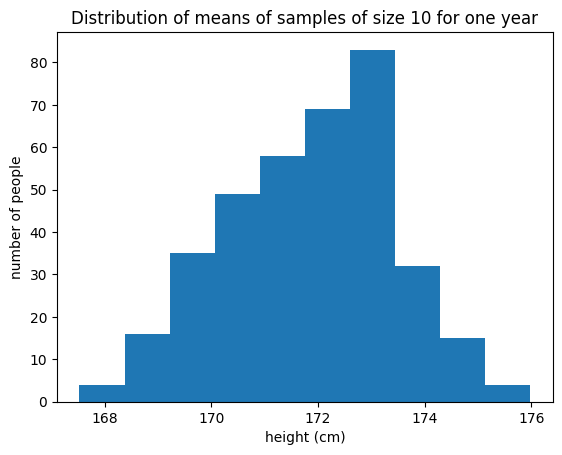

In [ ]:
plt.hist(daily_means)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of means of samples of size 10 for one year')

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

__Q9:__ Verify the above results from the CLT.

__A:__

Expected mean of the sampling distribution: 172 cm


In [ ]:
# Expected standard deviation of the sampling distribution (sigma / sqrt(n))
population_std = 5  # Given in the problem description
sample_size = 10 # Given in the problem description
expected_std = population_std / np.sqrt(sample_size)
print(f"Expected standard deviation of the sampling distribution: {expected_std:.2f} cm")

# Standard deviation of our sample means
observed_std = daily_means_series.std()
print(f"Observed standard deviation of the sample means: {observed_std:.2f} cm")

Expected standard deviation of the sampling distribution: 1.58 cm
Observed standard deviation of the sample means: 1.58 cm


Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

__Q10:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year)! Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

__A:__ According to CLT, the standard deviation of the sampling distribution of the mean is inversely proportional to the square root of the sample size ($\sigma_{mean} = \sigma / \sqrt n$), so the larger sample size of 50 should be narrower and more consistent

In [ ]:
seed(47)
# calculate daily means from the larger sample size here
daily_means_50 = []
for i in range(365):
    daily_sample_50 = townsfolk_sampler(50)
    daily_means_50.append(np.mean(daily_sample_50))
daily_means_50_series = pd.Series(daily_means_50)
daily_means_50_series.describe()

,0
count,365.000000
mean,171.943661
std,0.674535
min,170.079529
25%,171.451073
50%,171.962108
75%,172.474836
max,173.803012


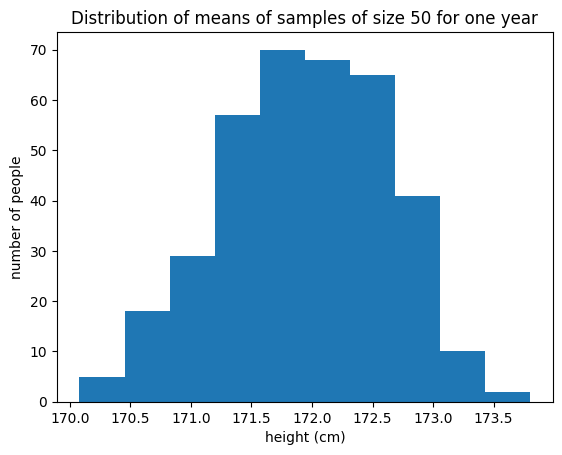

In [ ]:

plt.hist(daily_means_50)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of means of samples of size 50 for one year')

In [ ]:
# Expected mean of the sampling distribution (equal to population mean)
expected_mean_50 = 172
print(f"Expected mean of the sampling distribution (n=50): {expected_mean_50} cm")

# Expected standard deviation of the sampling distribution (sigma / sqrt(n))
population_std = 5  # Given in the problem description
sample_size_50 = 50 # Given in the problem description
expected_std_50 = population_std / np.sqrt(sample_size_50)
print(f"Expected standard deviation of the sampling distribution (n=50): {expected_std_50:.2f} cm")

# Standard deviation of our sample means
observed_std_50 = daily_means_50_series.std()
print(f"Observed standard deviation of the sample means (n=50): {observed_std_50:.2f} cm")

print(f"The standard deviation for sample size 10 was {observed_std:.2f} cm, which is wider than the standard deviation for sample size 50 ({observed_std_50:.2f} cm).")

Expected mean of the sampling distribution (n=50): 172 cm
Expected standard deviation of the sampling distribution (n=50): 0.71 cm
Observed standard deviation of the sample means (n=50): 0.67 cm


What we've seen so far, then, is that we can estimate population parameters from a sample from the population, and that samples have their own distributions. Furthermore, the larger the sample size, the narrower are those sampling distributions.

### Normally testing time!

All of the above is well and good. We've been sampling from a population we know is normally distributed, we've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution, and we've  seen the Central Limit Theorem in action for a sampling distribution. All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but we still have to estimate them somehow. If we want to make inferences to conclusions like "this observation is unusual" or "my population mean has changed" then we need to have some idea of what the underlying distribution is so we can calculate relevant probabilities. In frequentist inference, we use the formulae above to deduce these population parameters. Take a moment in the next part of this assignment to refresh your understanding of how these probabilities work.

Recall some basic properties of the standard normal distribution, such as that about 68% of observations are within plus or minus 1 standard deviation of the mean. Check out the precise definition of a normal distribution on p. 394 of *AoS*.

__Q11:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

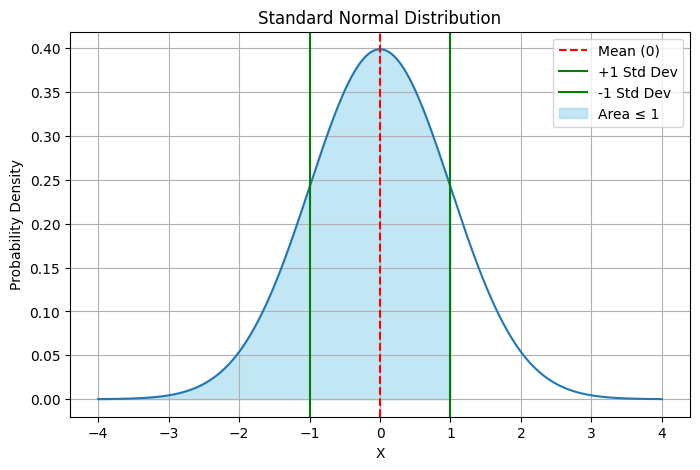

The percentage of the shaded region (area less than or equal to 1) is: 84.13%


In [71]:
# Generate a range of x-values for the standard normal distribution
x = np.linspace(-4, 4, 1000)

# Calculate the corresponding pdf values
pdf_values = norm.pdf(x)

# Plot the standard normal distribution
plt.figure(figsize=(8, 5))
plt.plot(x, pdf_values)
plt.title('Standard Normal Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.grid(True)

# Add vertical lines at the mean (0) and +/- 1 standard deviation
plt.axvline(0, color='red', linestyle='--', label='Mean (0)')
plt.axvline(1, color='green', linestyle='-', label='+1 Std Dev')
plt.axvline(-1, color='green', linestyle='-', label='-1 Std Dev')

# Shade the region less than 1
x_shaded = np.linspace(-4, 1, 1000)
pdf_shaded = norm.pdf(x_shaded)
plt.fill_between(x_shaded, pdf_shaded, color='skyblue', alpha=0.5, label='Area ≤ 1')

plt.legend()
plt.show()

# Calculate the percentage of the shaded region using the cdf
percentage_shaded = norm.cdf(1) * 100
print(f"The percentage of the shaded region (area less than or equal to 1) is: {percentage_shaded:.2f}%")

__A:__ Based on the output and confirming with the known percentages of the values that each section of the normal distribution contains, we can conclude that 84.13% of the values of a standard normal distrbution are less than or equal to 1 standard deviation from the mean in the positive direction.

Calculating this probability involved calculating the area under the curve from the value of 1 and below. To put it in mathematical terms, we need to *integrate* the probability density function. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above). One way to do this is to look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

__Q12:__ Use the cdf() function to answer the question above again and verify you get the same answer.

__A:__ Based on the results, we can once again confirm our previous answer.

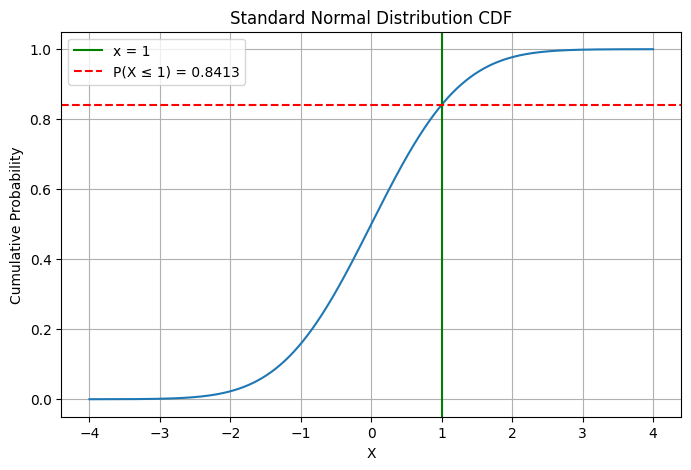

In [73]:
# Generate a range of x-values for the standard normal distribution
x = np.linspace(-4, 4, 1000)

# Calculate the corresponding cdf values
cdf_values = norm.cdf(x)

# Plot the standard normal distribution cdf
plt.figure(figsize=(8, 5))
plt.plot(x, cdf_values)
plt.title('Standard Normal Distribution CDF')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.grid(True)

# Add a vertical line at x=1 to show the cumulative probability up to 1
plt.axvline(1, color='green', linestyle='-', label='x = 1')

# Add a horizontal line at the cdf value of 1 to show the corresponding cumulative probability
plt.axhline(norm.cdf(1), color='red', linestyle='--', label=f'P(X ≤ 1) = {norm.cdf(1):.4f}')

plt.legend()
plt.show()

__Q13:__ Using our knowledge of the population parameters for our townsfolks' heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

__A:__ Logically, one can infer that the target height value also happens to be one standard deviation away from the mean which would give us the same answer as above of 84.13%, but we can also recreate the plots to give further proof of this as seen below.

Z-score for a height of 177 cm: 1.00
Probability of a height being 177 cm or less: 0.8413


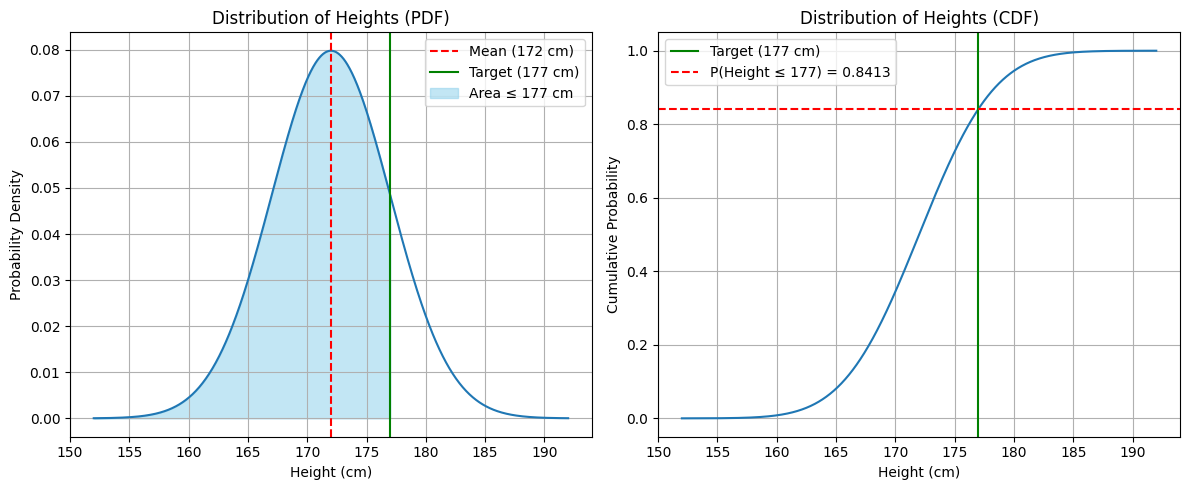

In [78]:
# Q13: Probability of selecting a person with height 177 cm or less

# Population parameters
population_mean = 172
population_std = 5
target_height = 177

# Calculate the z-score
z_score = (target_height - population_mean) / population_std
print(f"Z-score for a height of 177 cm: {z_score:.2f}")

# Calculate the probability using the cdf of the standard normal distribution and the z-score
probability_177_or_less = norm.cdf(z_score)
print(f"Probability of a height being 177 cm or less: {probability_177_or_less:.4f}")

# --- Add plots for visualization ---

# Generate a range of x-values for the normal distribution of heights
x = np.linspace(population_mean - 4*population_std, population_mean + 4*population_std, 1000)

# Calculate the corresponding pdf values
pdf_values = norm.pdf(x, loc=population_mean, scale=population_std)

# Plot the normal distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # Create a subplot for the PDF
plt.plot(x, pdf_values)
plt.title('Distribution of Heights (PDF)')
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.grid(True)

# Add vertical lines at the mean and target height
plt.axvline(population_mean, color='red', linestyle='--', label=f'Mean ({population_mean} cm)')
plt.axvline(target_height, color='green', linestyle='-', label=f'Target ({target_height} cm)')

# Shade the region less than or equal to the target height
x_shaded = np.linspace(population_mean - 4*population_std, target_height, 1000)
pdf_shaded = norm.pdf(x_shaded, loc=population_mean, scale=population_std)
plt.fill_between(x_shaded, pdf_shaded, color='skyblue', alpha=0.5, label=f'Area ≤ {target_height} cm')

plt.legend()

# Calculate the corresponding cdf values
cdf_values = norm.cdf(x, loc=population_mean, scale=population_std)

# Plot the normal distribution cdf
plt.subplot(1, 2, 2) # Create a subplot for the CDF
plt.plot(x, cdf_values)
plt.title('Distribution of Heights (CDF)')
plt.xlabel('Height (cm)')
plt.ylabel('Cumulative Probability')
plt.grid(True)

# Add a vertical line at the target height to show the cumulative probability
plt.axvline(target_height, color='green', linestyle='-', label=f'Target ({target_height} cm)')

# Add a horizontal line at the cumulative probability of the target height
plt.axhline(probability_177_or_less, color='red', linestyle='--', label=f'P(Height ≤ {target_height}) = {probability_177_or_less:.4f}')

plt.legend()
plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

__Q14:__ Turning this question around — suppose we randomly pick one person and measure their height and find they are 2.00 m tall. How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

__A:__ This would be an incredible outlier. The odds of a person being 2.00m tall for this population would be 0.0000000107, 0.00000107%, or roughly 1 in 87.25 billion.

Z-score for a height of 200 cm: 5.60
Probability of a height being 200 cm or more: 0.0000000107


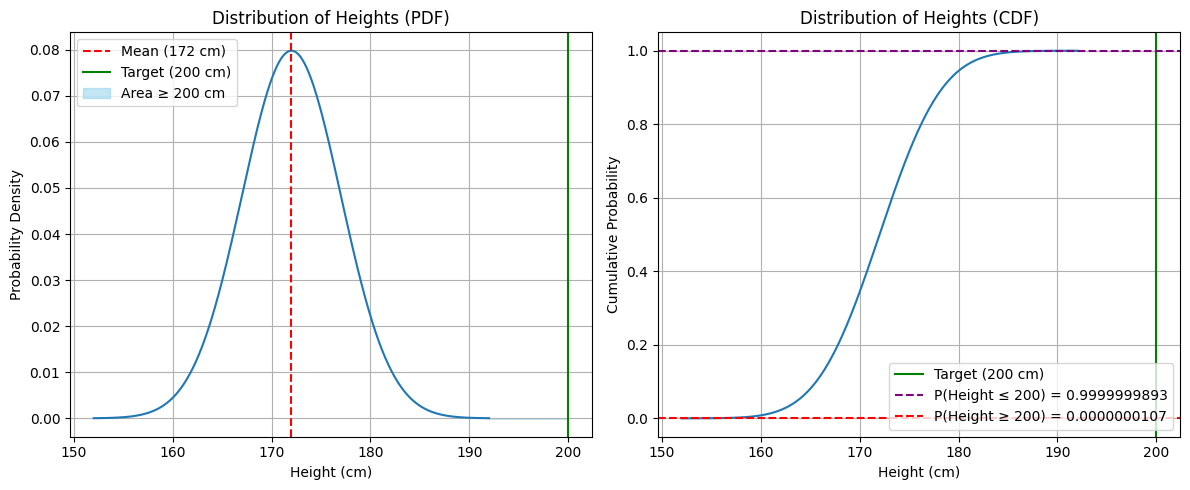

In [84]:
# Q14: Probability of selecting a person with height 200 cm or more

# Population parameters
population_mean = 172
population_std = 5
target_height = 200

# Calculate the z-score
z_score = (target_height - population_mean) / population_std
print(f"Z-score for a height of {target_height} cm: {z_score:.2f}")

# Calculate the probability using the survival function (sf) of the standard normal distribution and the z-score
# sf(z) gives the probability of observing a value greater than z
probability_200_or_more = norm.sf(z_score)
print(f"Probability of a height being {target_height} cm or more: {probability_200_or_more:.10f}")

# --- Add plots for visualization ---

# Generate a range of x-values for the normal distribution of heights
x = np.linspace(population_mean - 4*population_std, population_mean + 4*population_std, 1000)

# Calculate the corresponding pdf values
pdf_values = norm.pdf(x, loc=population_mean, scale=population_std)

# Plot the normal distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # Create a subplot for the PDF
plt.plot(x, pdf_values)
plt.title('Distribution of Heights (PDF)')
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.grid(True)

# Add vertical lines at the mean and target height
plt.axvline(population_mean, color='red', linestyle='--', label=f'Mean ({population_mean} cm)')
plt.axvline(target_height, color='green', linestyle='-', label=f'Target ({target_height} cm)')

# Shade the region greater than or equal to the target height
x_shaded = np.linspace(target_height, population_mean + 4*population_std, 1000)
pdf_shaded = norm.pdf(x_shaded, loc=population_mean, scale=population_std)
plt.fill_between(x_shaded, pdf_shaded, color='skyblue', alpha=0.5, label=f'Area ≥ {target_height} cm')

plt.legend()

# Calculate the corresponding cdf values
cdf_values = norm.cdf(x, loc=population_mean, scale=population_std)

# Plot the normal distribution cdf
plt.subplot(1, 2, 2) # Create a subplot for the CDF
plt.plot(x, cdf_values)
plt.title('Distribution of Heights (CDF)')
plt.xlabel('Height (cm)')
plt.ylabel('Cumulative Probability')
plt.grid(True)

# Add a vertical line at the target height to show the cumulative probability
plt.axvline(target_height, color='green', linestyle='-', label=f'Target ({target_height} cm)')

# Add a horizontal line at the cumulative probability of the target height (for P <= target)
# And another horizontal line at 1 - cdf (for P >= target)
plt.axhline(norm.cdf(z_score), color='purple', linestyle='--', label=f'P(Height ≤ {target_height}) = {norm.cdf(z_score):.10f}')
plt.axhline(probability_200_or_more, color='red', linestyle='--', label=f'P(Height ≥ {target_height}) = {probability_200_or_more:.10f}')


plt.legend()
plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

What we've just done is calculate the ***p-value*** of the observation of someone 2.00m tall (review *p*-values if you need to on p. 399 of *AoS*). We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value.

We're about to come to a pinch, though. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation.

This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation.

In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain.

Above, we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that _even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size_. (**Check out p. 199 of AoS if you need to revise this**). This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.

__Q15:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use the random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf()) Recall that the ***margin of error*** is mentioned on p. 189 of the *AoS* and discussed in depth in that chapter).
* Calculate the 95% Confidence Interval of the mean (***confidence intervals*** are defined on p. 385 of *AoS*)
* Does this interval include the true population mean?

__A:__

In [85]:
# Q15: Estimate population parameters and calculate confidence interval from a sample

# Use the random seed of 47
seed(47)

# Randomly sample the heights of 50 townsfolk
sample_size = 50
sample = townsfolk_sampler(sample_size)

# Estimate the population mean using np.mean
sample_mean = np.mean(sample)
print(f"Estimated population mean from sample: {sample_mean:.2f} cm")

# Estimate the population standard deviation using np.std with ddof=1 (Bessel's correction)
sample_std = np.std(sample, ddof=1)
print(f"Estimated population standard deviation from sample: {sample_std:.2f} cm")

Estimated population mean from sample: 172.78 cm
Estimated population standard deviation from sample: 4.20 cm


In [86]:
# Calculate the 95% margin of error using the critical z-value

# For a 95% confidence interval, the alpha level is 0.05.
# We need the z-score that leaves 0.025 in each tail of the standard normal distribution.
# We can find this using norm.ppf(1 - alpha/2) or norm.ppf(0.975)

alpha = 0.05
critical_z_value = norm.ppf(1 - alpha/2)
print(f"Critical z-value for a 95% confidence interval: {critical_z_value:.2f}")

# The standard error of the mean is the sample standard deviation divided by the square root of the sample size
standard_error = sample_std / np.sqrt(sample_size)
print(f"Standard error of the mean: {standard_error:.2f} cm")

# Margin of error = critical z-value * standard error
margin_of_error = critical_z_value * standard_error
print(f"95% Margin of Error: {margin_of_error:.2f} cm")

Critical z-value for a 95% confidence interval: 1.96
Standard error of the mean: 0.59 cm
95% Margin of Error: 1.16 cm


In [87]:
# Calculate the 95% Confidence Interval of the mean
confidence_interval_lower = sample_mean - margin_of_error
confidence_interval_upper = sample_mean + margin_of_error

print(f"95% Confidence Interval of the mean: ({confidence_interval_lower:.2f}, {confidence_interval_upper:.2f}) cm")

# Check if the true population mean is within the confidence interval
true_population_mean = 172  # We know this from the problem description
is_within_interval = confidence_interval_lower <= true_population_mean <= confidence_interval_upper

print(f"Does the 95% Confidence Interval include the true population mean ({true_population_mean} cm)? {is_within_interval}")

95% Confidence Interval of the mean: (171.62, 173.94) cm
Does the 95% Confidence Interval include the true population mean (172 cm)? True


__Q16:__ Above, we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

__A:__ The problem with using the critical z-value here is that it relies on the assumption that we know the true population standard deviation ($\sigma$). In most real-world scenarios, we don't know the population standard deviation; we have to estimate it from our sample using the sample standard deviation ($s$).

The z-distribution is appropriate when either:

1. We know the true population standard deviation ($\sigma$).

2. Our sample size is large enough (typically n > 30) that the sample standard deviation ($s$) is a very good estimate of the population standard deviation ($\sigma$), and the sampling distribution of the mean is approximately normal by the Central Limit Theorem.
In this case, although our sample size is 50 (which is often considered "large enough" by a rule of thumb), we are using the sample standard deviation ($s$) as an estimate for the population standard deviation ($\sigma$). Strictly speaking, when using the sample standard deviation to estimate the population standard deviation with a sample of size $n$, especially for smaller $n$, the sampling distribution of the mean follows a t-distribution with $n-1$ degrees of freedom, not a z-distribution.

So, the requirement we are strictly failing is the knowledge of the true population standard deviation. While a sample size of 50 is often sufficient for the t-distribution to closely approximate the z-distribution, using the t-distribution is more theoretically accurate when using the sample standard deviation.

__Q17:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

__A:__ The confidence interval based on the t-distribution is wider than the one based on the z-distribution.

In [88]:
# Q17: Calculate the 95% confidence interval using the t-distribution

# We already have the sample_mean and sample_std from Q15, and sample_size = 50

# Degrees of freedom for the t-distribution is n - 1
degrees_of_freedom = sample_size - 1
print(f"Degrees of freedom: {degrees_of_freedom}")

# For a 95% confidence interval, alpha = 0.05. We need the t-value that leaves alpha/2 in each tail.
# We can find this using t.ppf(1 - alpha/2, df)
alpha = 0.05
critical_t_value = t.ppf(1 - alpha/2, degrees_of_freedom)
print(f"Critical t-value for a 95% confidence interval: {critical_t_value:.2f}")

# The standard error of the mean is the sample standard deviation divided by the square root of the sample size
standard_error = sample_std / np.sqrt(sample_size)
print(f"Standard error of the mean: {standard_error:.2f} cm")

# Margin of error using t-distribution = critical t-value * standard error
margin_of_error_t = critical_t_value * standard_error
print(f"95% Margin of Error (t-distribution): {margin_of_error_t:.2f} cm")

# Calculate the 95% Confidence Interval of the mean using the t-distribution
confidence_interval_lower_t = sample_mean - margin_of_error_t
confidence_interval_upper_t = sample_mean + margin_of_error_t

print(f"95% Confidence Interval of the mean (t-distribution): ({confidence_interval_lower_t:.2f}, {confidence_interval_upper_t:.2f}) cm")

# Compare with the z-distribution based confidence interval
print(f"\n95% Confidence Interval (z-distribution): ({confidence_interval_lower:.2f}, {confidence_interval_upper:.2f}) cm")

width_t = confidence_interval_upper_t - confidence_interval_lower_t
width_z = confidence_interval_upper - confidence_interval_lower

if width_t > width_z:
    print("The confidence interval based on the t-distribution is wider than the one based on the z-distribution.")
elif width_t < width_z:
    print("The confidence interval based on the t-distribution is narrower than the one based on the z-distribution.")
else:
    print("The confidence intervals based on the t-distribution and z-distribution have the same width.")

Degrees of freedom: 49
Critical t-value for a 95% confidence interval: 2.01
Standard error of the mean: 0.59 cm
95% Margin of Error (t-distribution): 1.19 cm
95% Confidence Interval of the mean (t-distribution): (171.59, 173.97) cm

95% Confidence Interval (z-distribution): (171.62, 173.94) cm
The confidence interval based on the t-distribution is wider than the one based on the z-distribution.


This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.

## 4. Learning outcomes

Having completed this project notebook, you now have hands-on experience:
* sampling and calculating probabilities from a normal distribution
* identifying the correct way to estimate the standard deviation of a population (the population parameter) from a sample
* with sampling distribution and now know how the Central Limit Theorem applies
* with how to calculate critical values and confidence intervals

**NOTE: This project was completed with the assistance of Gemini AI built into Google Colab.**